In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
import os
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import probplot

In [2]:
os.chdir("C:\\Users\\DELL\\Desktop\\DS-Assignment")

In [3]:
data = pd.read_excel("DS - Assignment Part 1 data set.xlsx")

In [4]:
data

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1
...,...,...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,1,503,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,1,597,52.5


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [6]:
data.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

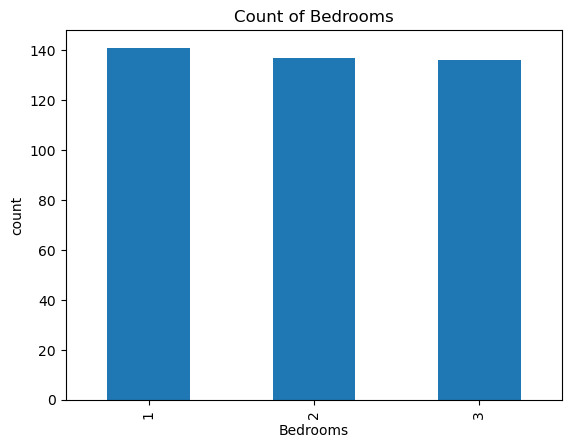

In [7]:
data['Number of bedrooms'].value_counts().plot(kind='bar')
plt.title('Count of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('count')
sns.despine

<Figure size 1000x1000 with 0 Axes>

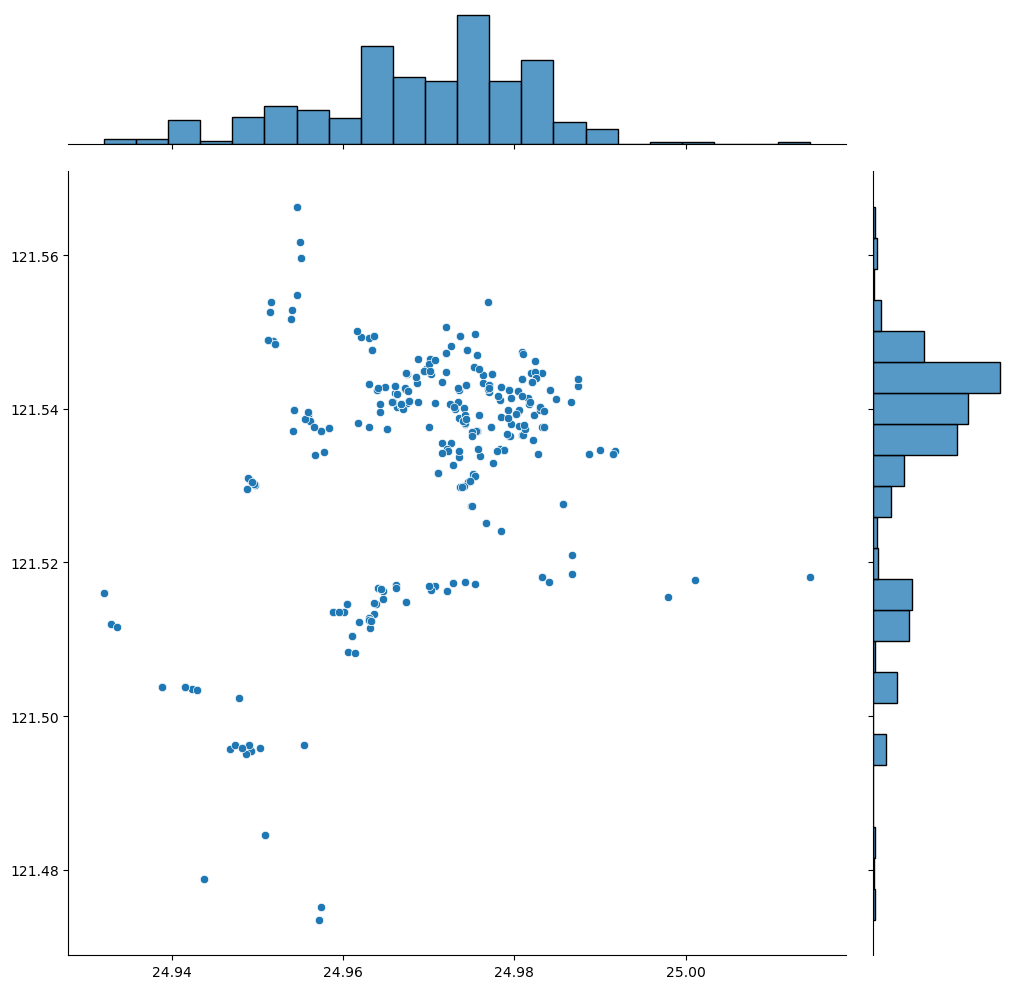

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [8]:
plt.figure(figsize=(10,10))
sns.jointplot(x=data.latitude.values, y=data.longitude.values, height=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.show()
sns.despine

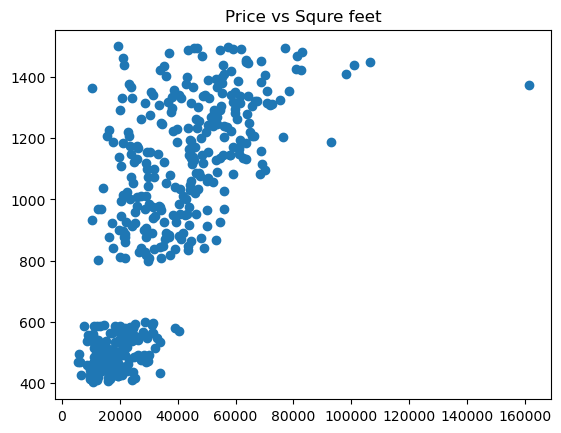

In [9]:
price = data['House price of unit area']*data['House size (sqft)']
size_sqft = data['House size (sqft)']
plt.scatter(price, size_sqft)
plt.title('Price vs Squre feet')
plt.show()

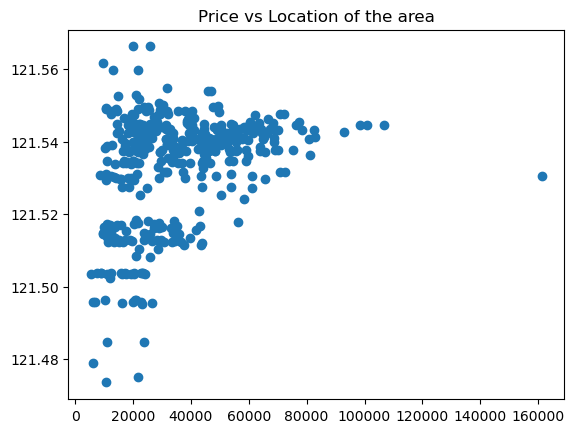

In [10]:
plt.scatter(price, data.longitude)
plt.title('Price vs Location of the area')
plt.show()

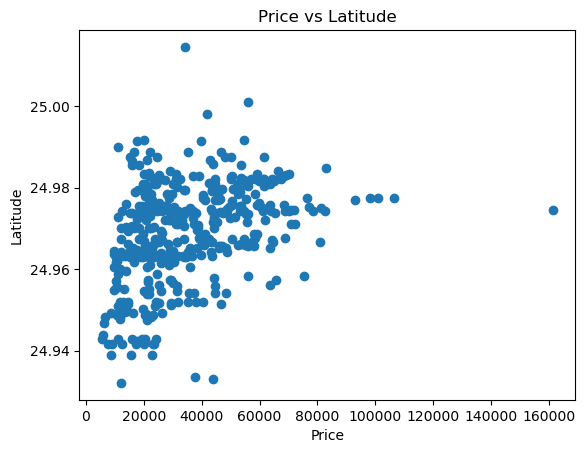

In [11]:
plt.scatter(price, data.latitude)
plt.title('Price vs Latitude')
plt.xlabel('Price')
plt.ylabel('Latitude')
plt.show()

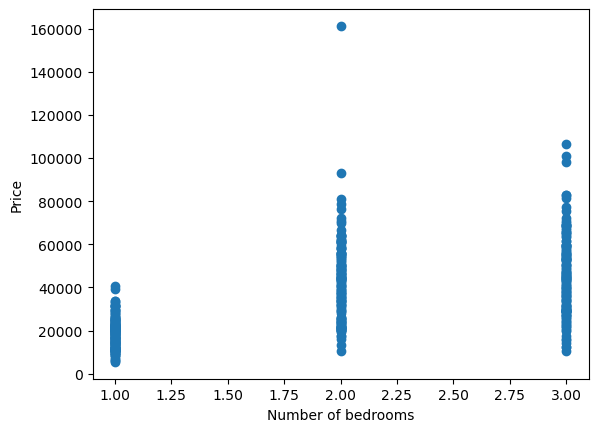

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [12]:
plt.scatter(data['Number of bedrooms'], price)
plt.xlabel('Number of bedrooms')
plt.ylabel('Price')
plt.show()
sns.despine

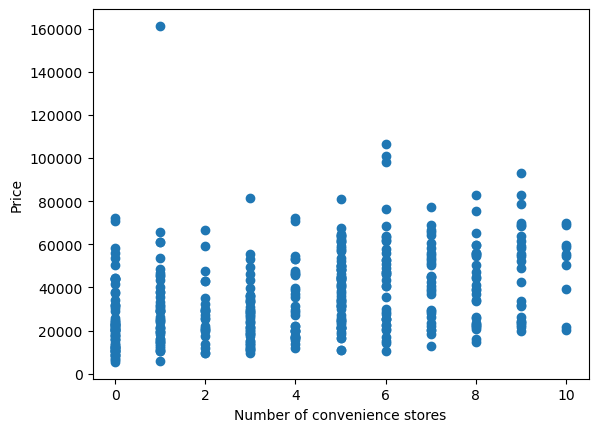

In [13]:
plt.scatter(data['Number of convenience stores'], price)
plt.xlabel('Number of convenience stores')
plt.ylabel('Price')
plt.show()

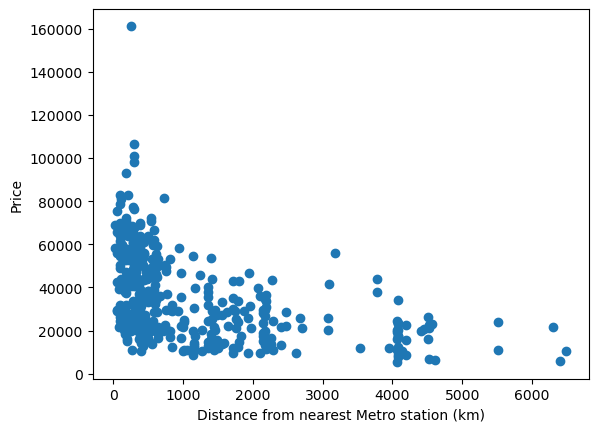

In [14]:
plt.scatter(data['Distance from nearest Metro station (km)'], price)
plt.xlabel('Distance from nearest Metro station (km)')
plt.ylabel('Price')
plt.show()

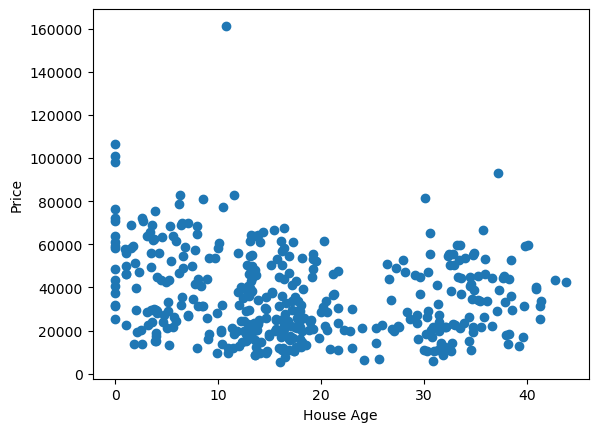

In [15]:
plt.scatter(data['House Age'], price)
plt.xlabel('House Age')
plt.ylabel('Price')
plt.show()

Skewness of House Age: 0.38292623077299737
Kurtosis of House Age: -0.8771201112290763


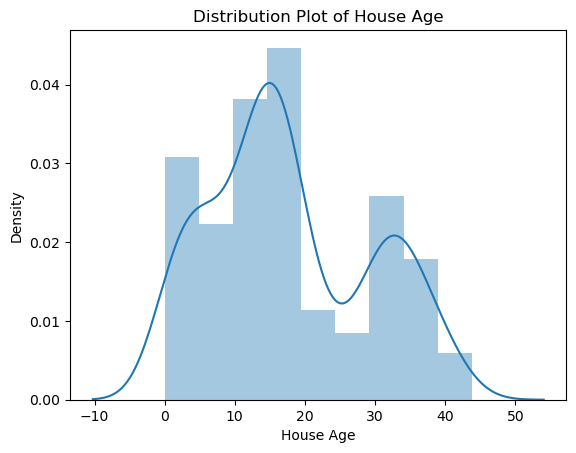

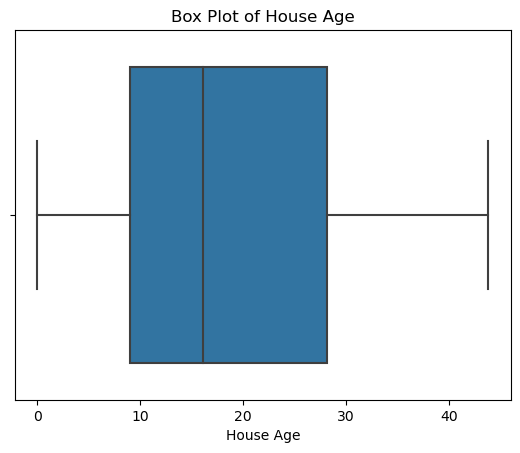

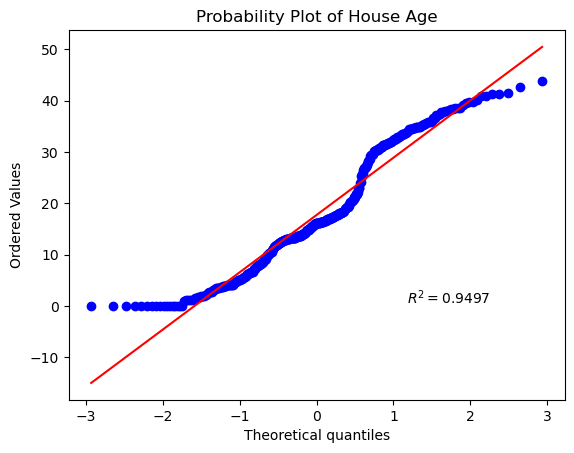

Skewness of Distance from nearest Metro station (km): 1.8887565801256048
Kurtosis of Distance from nearest Metro station (km): 3.20786836751181


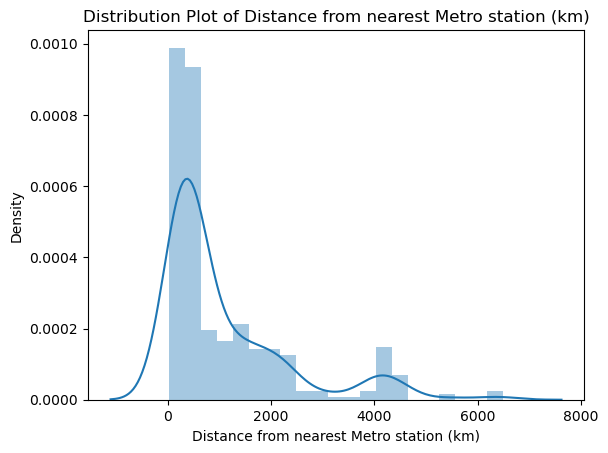

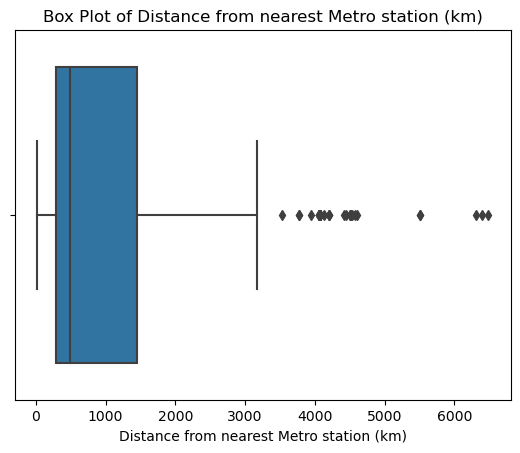

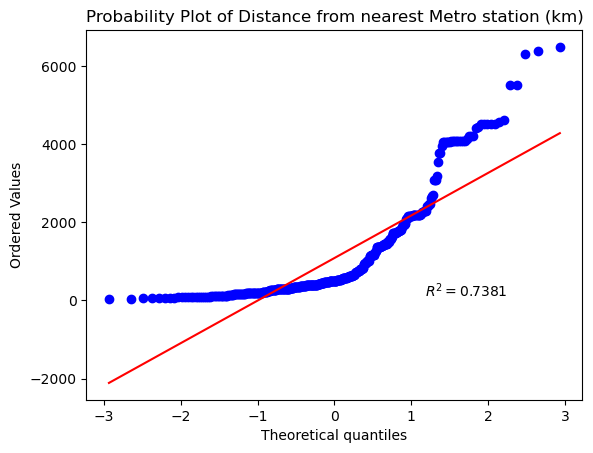

Skewness of Number of convenience stores: 0.15460656758377123
Kurtosis of Number of convenience stores: -1.0657514990134194


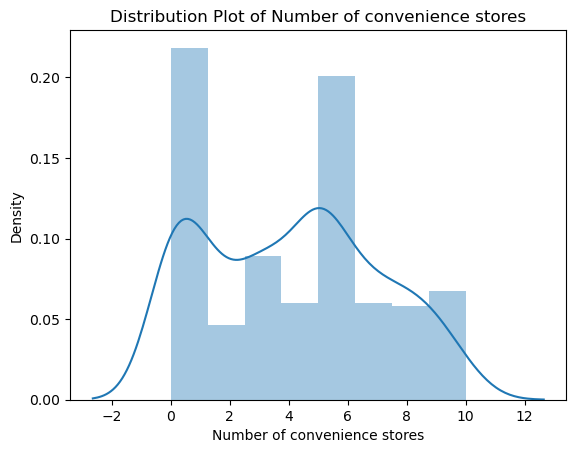

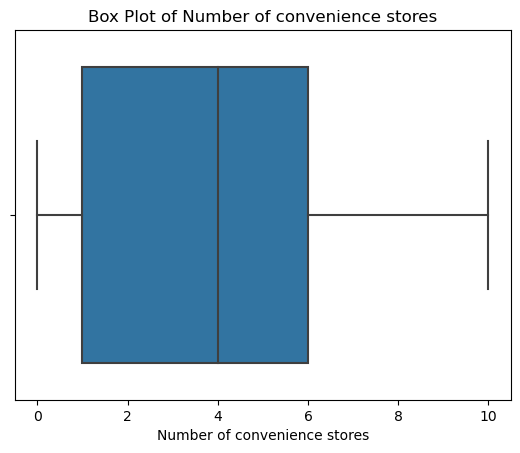

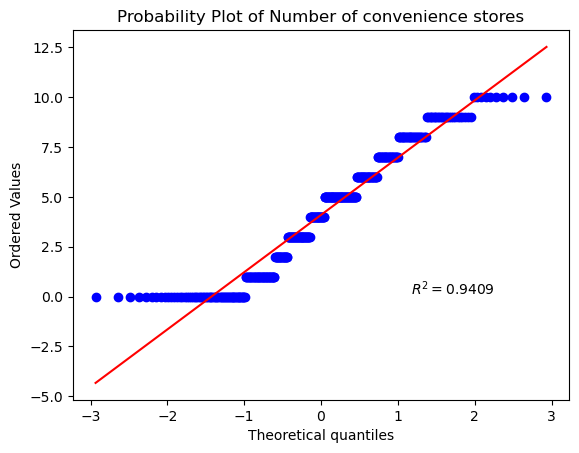

Skewness of latitude: -0.4385984450390504
Kurtosis of latitude: 0.26906977798608933


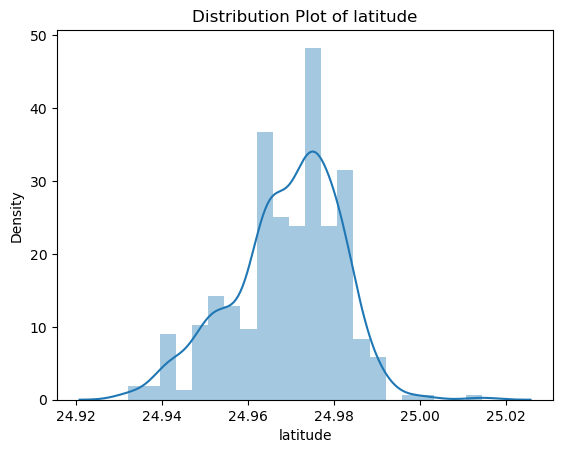

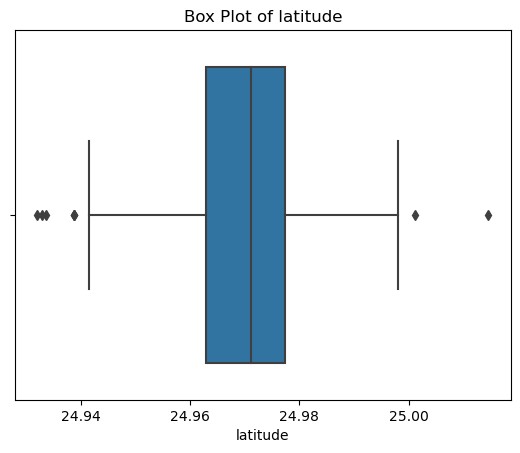

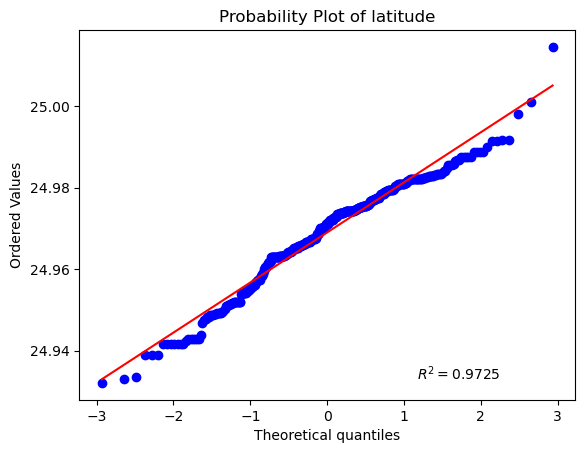

Skewness of longitude: -1.2195914979891498
Kurtosis of longitude: 1.2017924639738427


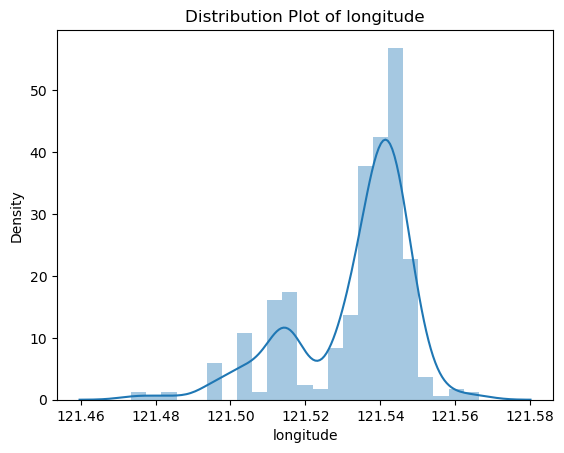

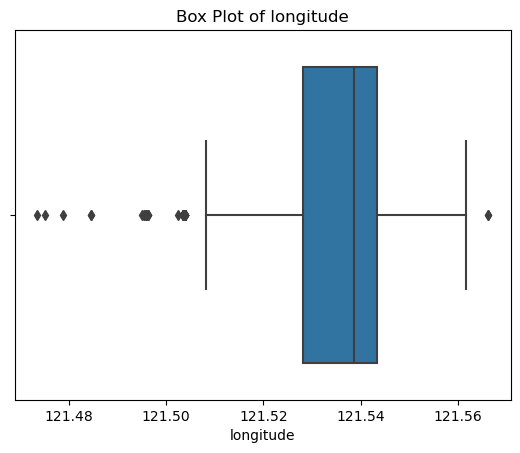

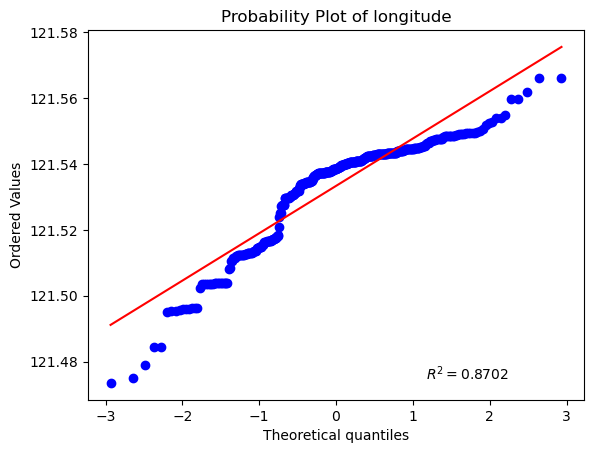

Skewness of Number of bedrooms: 0.022309017612164857
Kurtosis of Number of bedrooms: -1.5084574767476928


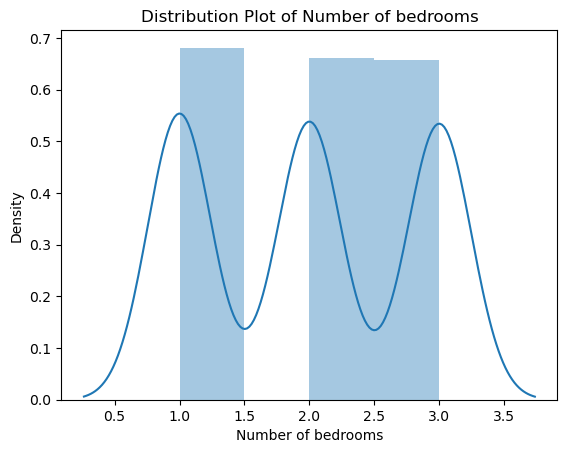

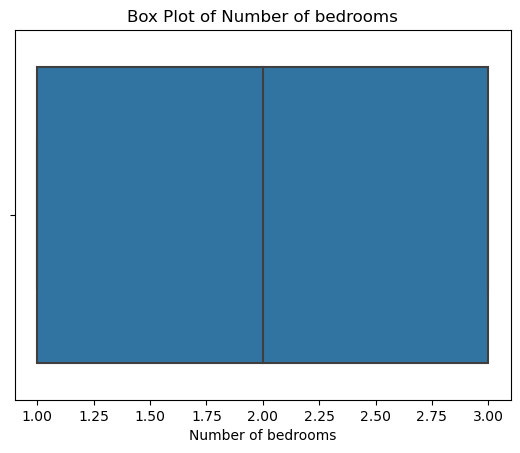

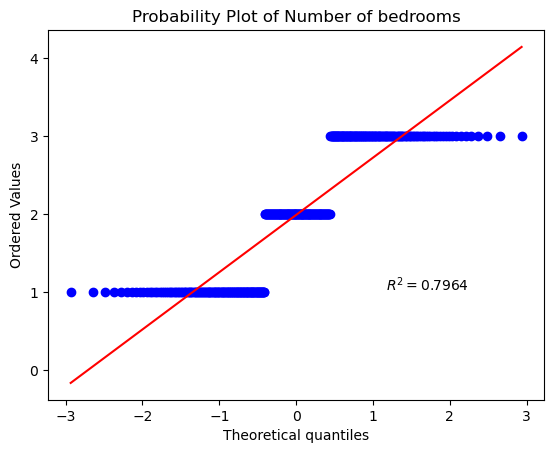

Skewness of House size (sqft): -0.11362728091036625
Kurtosis of House size (sqft): -1.4220194906438015


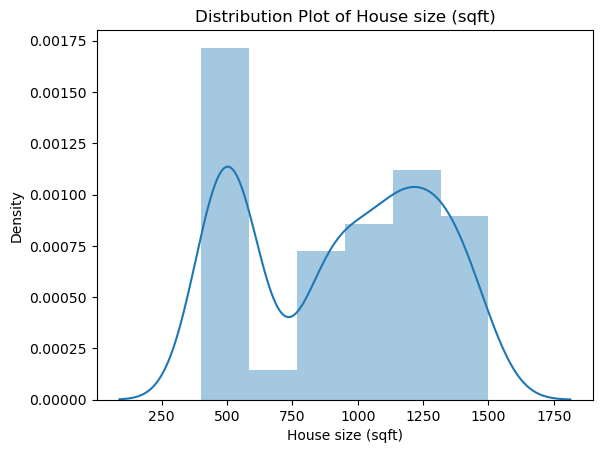

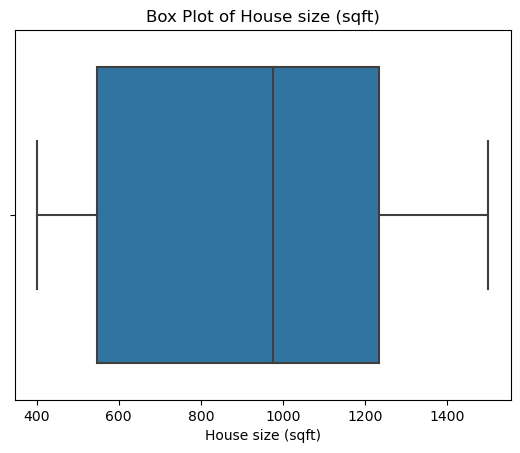

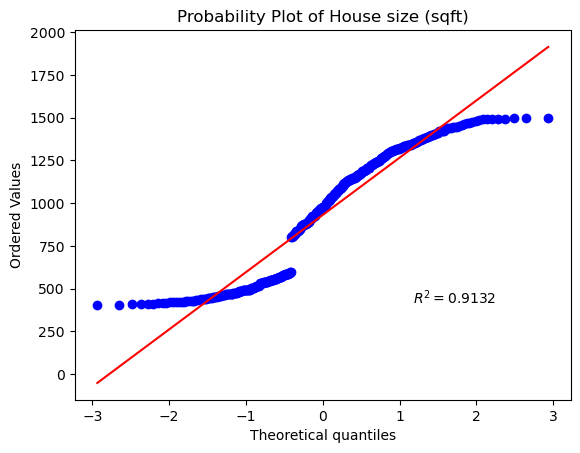

Skewness of House price of unit area: 0.5998525842660576
Kurtosis of House price of unit area: 2.1790970477396163


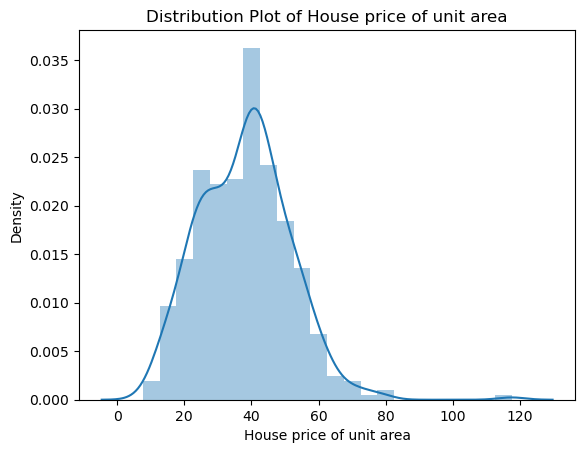

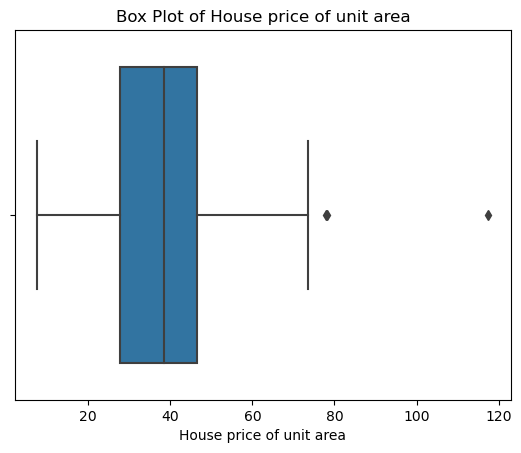

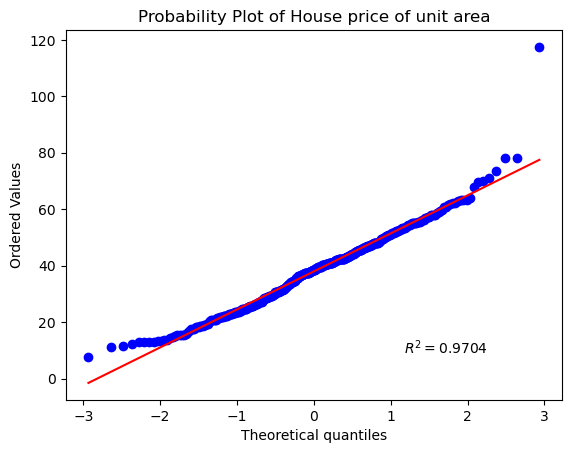

In [16]:
for col in data.columns:
    if col != 'Transaction date':
        print(f"Skewness of {col}:",data[col].skew())
        print(f"Kurtosis of {col}:",data[col].kurtosis())
        sns.distplot(data[col])
        plt.title(f'Distribution Plot of {col}')
        plt.show()
        sns.boxplot(data[col])
        plt.title(f'Box Plot of {col}')
        plt.show()
        probplot(data[col],plot=plt,rvalue=True)
        plt.title(f'Probability Plot of {col}')
        plt.show()

In [17]:
data.corr()["House price of unit area"].sort_values(ascending=False)

House price of unit area                    1.000000
Number of convenience stores                0.571005
latitude                                    0.546307
longitude                                   0.523287
Transaction date                            0.087529
Number of bedrooms                          0.050265
House size (sqft)                           0.046489
House Age                                  -0.210567
Distance from nearest Metro station (km)   -0.673613
Name: House price of unit area, dtype: float64

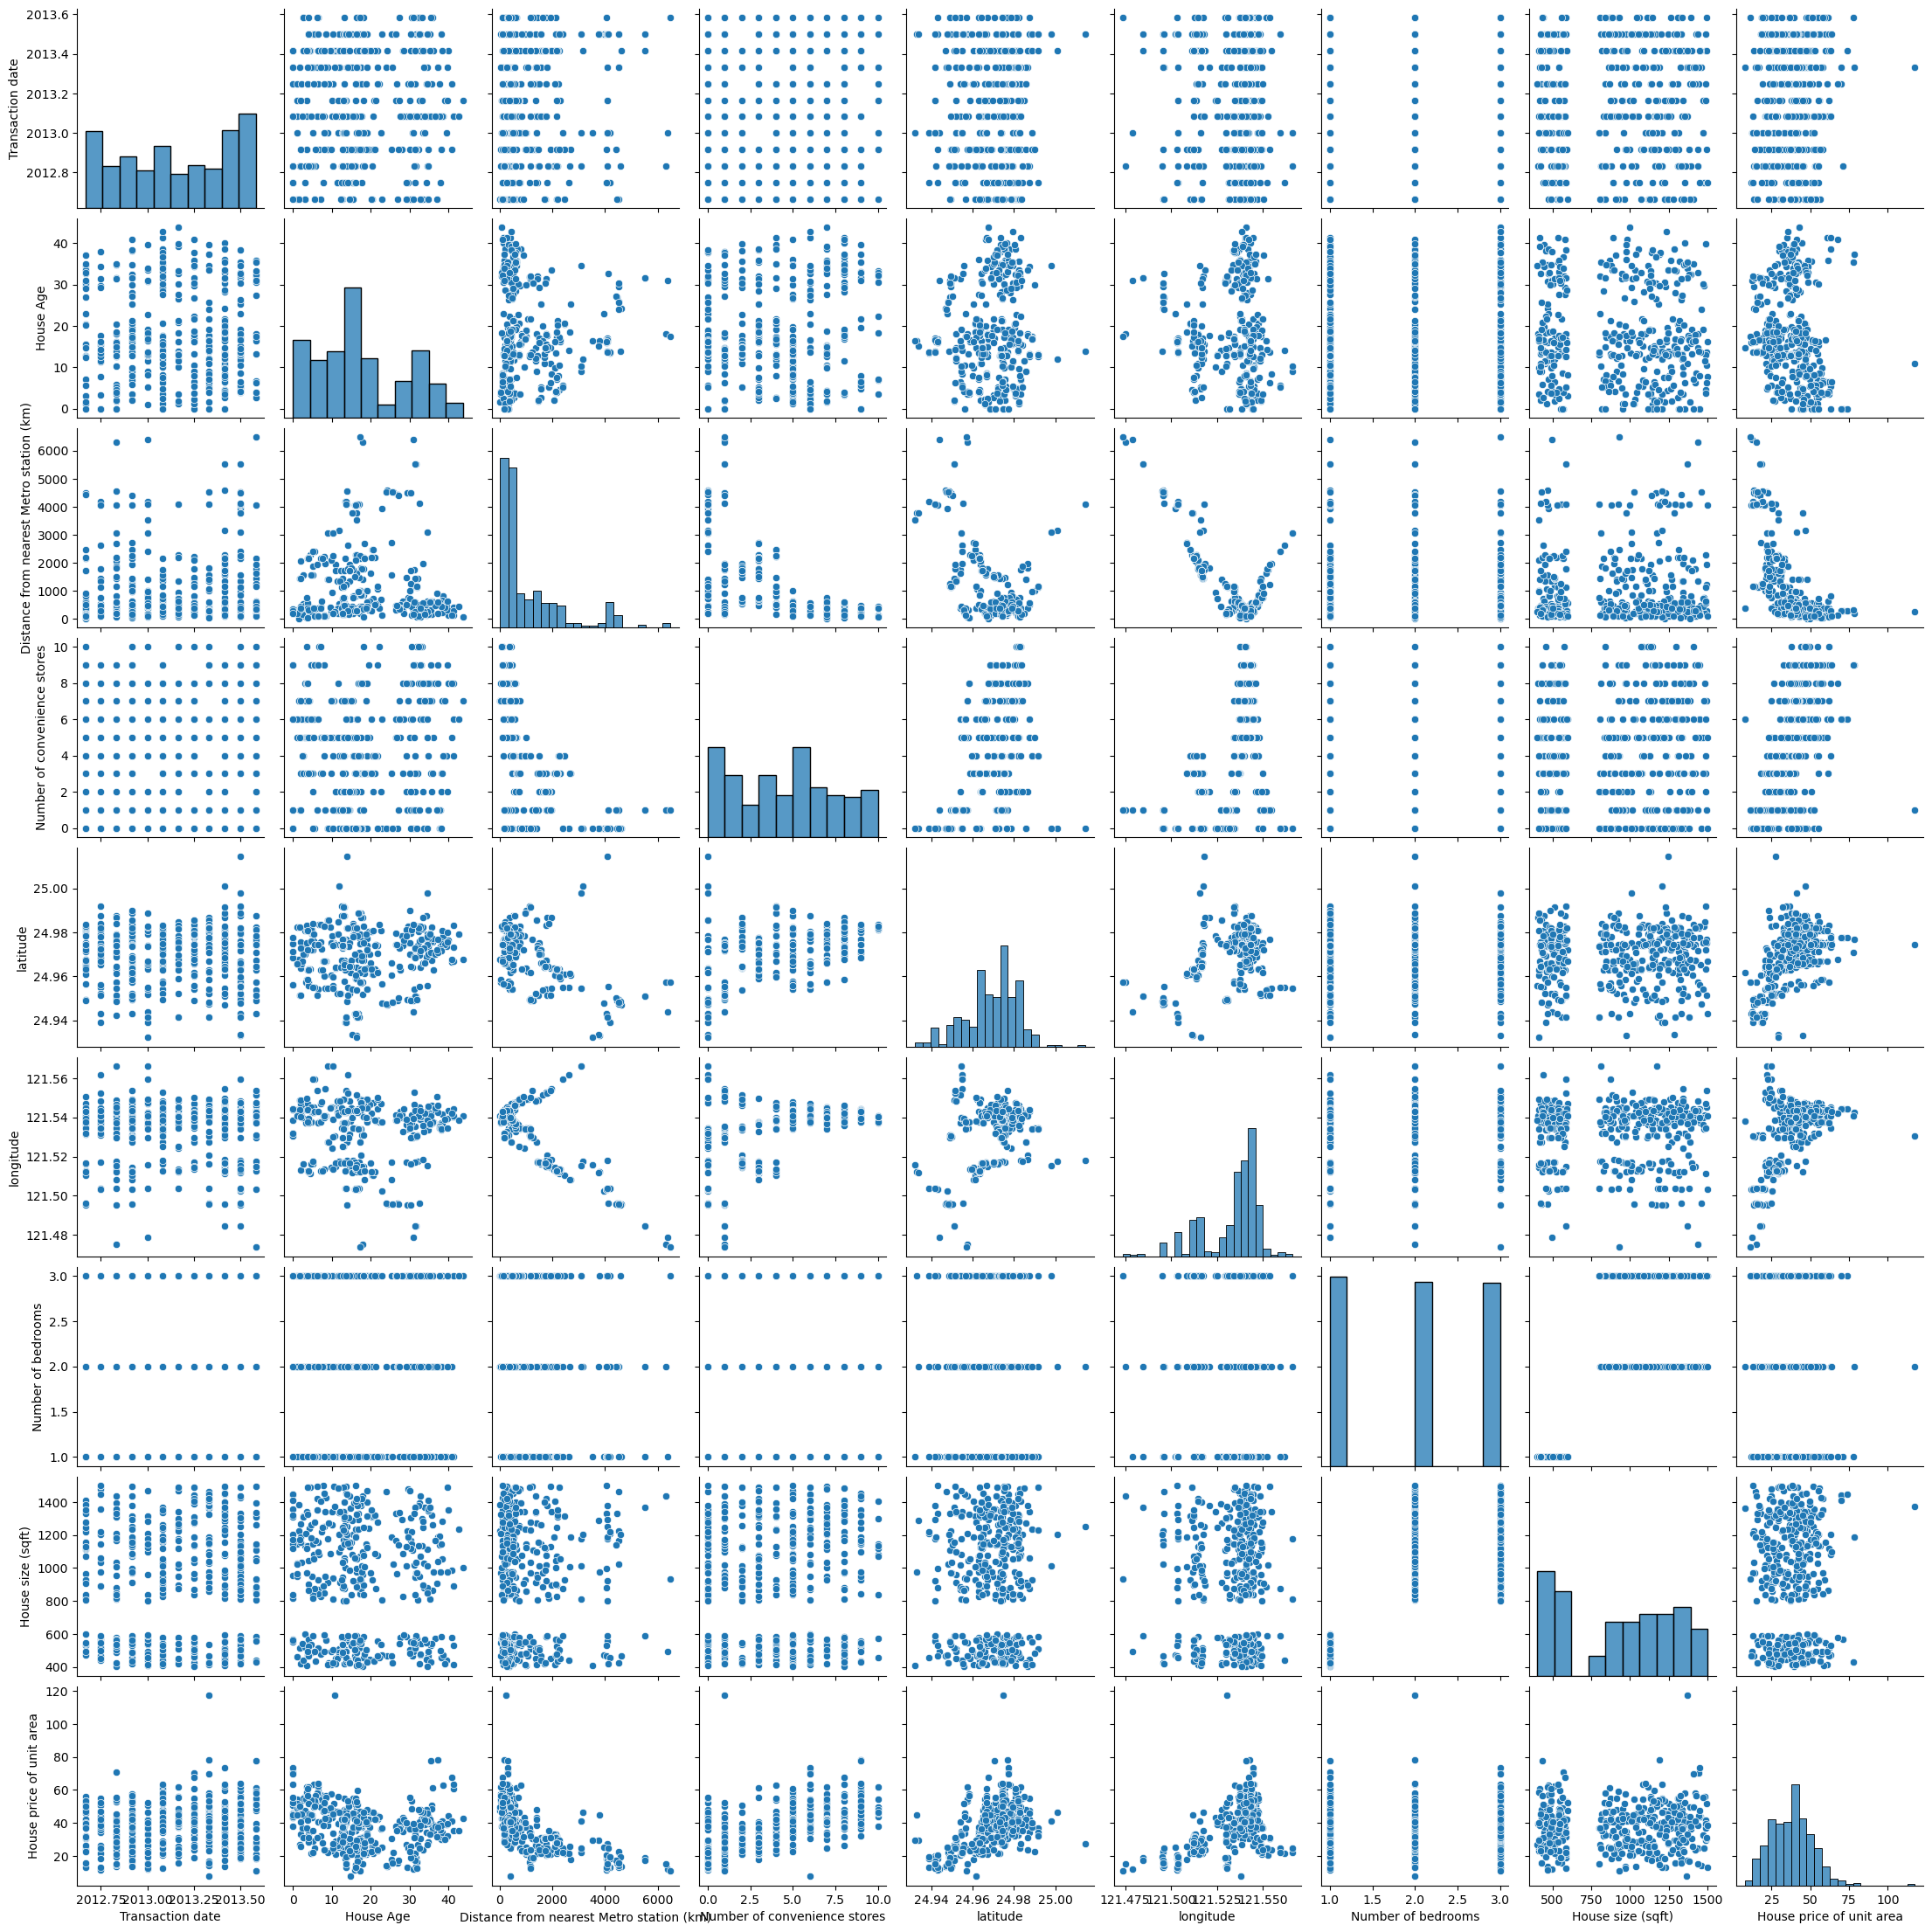

In [18]:
sns.pairplot(data,palette='viridis')

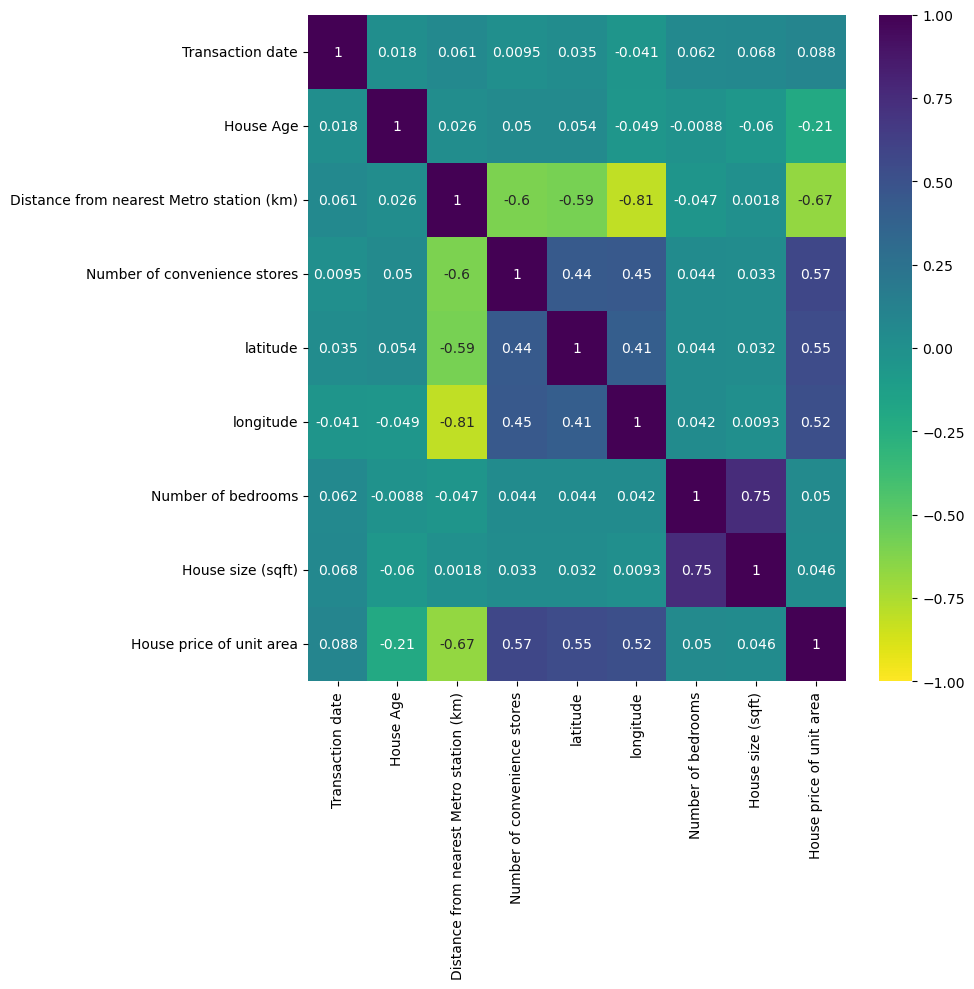

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,cmap='viridis_r',vmin=-1,vmax=1)
plt.tight_layout()

In [20]:
data_copy = data.copy()
data_copy.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [21]:
scaler = StandardScaler()
features = data_copy.columns
data_copy = scaler.fit_transform(data_copy)
data_copy = pd.DataFrame(data_copy,columns=features)
data_copy

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,-0.824722,1.255628,-0.792495,2.007407,1.125430,0.448762,-1.207899,-1.022920,-0.005901
1,-0.824722,0.157086,-0.616612,1.667503,0.912444,0.401139,0.014766,0.885321,0.310507
2,1.542244,-0.387791,-0.414015,0.307885,1.486860,0.688183,1.237432,0.368804,0.685782
3,1.246373,-0.387791,-0.414015,0.307885,1.486860,0.688183,0.014766,-0.162059,1.237656
4,-1.120593,-1.117223,-0.549997,0.307885,0.834188,0.592937,-1.207899,-1.263960,0.376732
...,...,...,...,...,...,...,...,...,...
409,-0.528851,-0.352637,2.378365,-1.391638,-2.216993,-1.927835,1.237432,-0.368666,-1.661525
410,-1.712334,-1.064493,-0.788071,1.667503,0.427579,0.635341,0.014766,0.994363,0.884457
411,0.358761,0.095568,-0.549678,0.987694,0.822893,0.423972,-1.207899,-1.229526,0.192774
412,-0.528851,-0.844784,-0.776684,0.307885,-0.184755,0.476814,-1.207899,-0.959790,1.068415


In [22]:
train1 = data.drop('House price of unit area',axis=1)
labels = data['House price of unit area']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(train1, labels, test_size=0.3, random_state=101, shuffle=True)

In [24]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [25]:
reg.score(x_test, y_test)

0.6438652713414581

In [26]:
models = []
scores = []

In [27]:
def fit_and_test_model(model):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    print("RMSE:",round(np.sqrt(mean_squared_error(y_test,pred)), 2))
    print("R2 Score: " + str(round(r2_score(y_test,pred)*100, 2)) + "%")
    models.append(str(model).split('(')[0])
    scores.append(round(r2_score(y_test,pred)*100, 2))

In [28]:
fit_and_test_model(LinearRegression())

RMSE: 6.87
R2 Score: 64.39%


In [29]:
fit_and_test_model(MLPRegressor())

RMSE: 6.74
R2 Score: 65.67%


In [30]:
fit_and_test_model(KNeighborsRegressor())

RMSE: 7.78
R2 Score: 54.22%


In [31]:
fit_and_test_model(GradientBoostingRegressor())

RMSE: 5.33
R2 Score: 78.51%


In [32]:
fit_and_test_model(RandomForestRegressor())

RMSE: 5.56
R2 Score: 76.63%


In [33]:
fit_and_test_model(HistGradientBoostingRegressor())

RMSE: 5.65
R2 Score: 75.85%


In [34]:
fit_and_test_model(BaggingRegressor())

RMSE: 5.96
R2 Score: 73.18%


In [35]:
fit_and_test_model(ExtraTreesRegressor())

RMSE: 5.29
R2 Score: 78.82%


In [38]:
model_performances = pd.DataFrame([models,scores]).T
model_performances.columns = ['Model','R2 Score']
model_performances.set_index('Model',inplace=True)
model_performances = model_performances.sort_values('R2 Score',ascending=False)
model_performances

,R2 Score
Model,
ExtraTreesRegressor,78.82
GradientBoostingRegressor,78.51
RandomForestRegressor,76.63
HistGradientBoostingRegressor,75.85
BaggingRegressor,73.18
MLPRegressor,65.67
LinearRegression,64.39
KNeighborsRegressor,54.22


In [39]:
knn = KNeighborsRegressor()
# dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
# cat = CatBoostRegressor(silent=True)
# xgb = XGBRegressor(eval_metric = 'logloss', use_label_encoder=False)
bag = BaggingRegressor()
et = ExtraTreesRegressor()
gb = GradientBoostingRegressor()
hist = HistGradientBoostingRegressor()
# lgbm = LGBMRegressor()
#KNN
para_knn = {'n_neighbors':np.arange(1, 50),'metric': ['manhattan','euclidean','minkowski','chebyshev'],'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'weights': ['uniform','distance']}  
grid_knn = GridSearchCV(knn, param_grid=para_knn) 

#Decision Tree
# para_dt = {'criterion':["squared_error", "friedman_mse", "absolute_error","poisson"], 'max_depth':np.arange(1, 50), 'min_samples_leaf':[1,2,4,5,10,20,30,40,80,100]}
# grid_dt = GridSearchCV(dt, param_grid=para_dt)

#Random Forest
params_rf = {'n_estimators':[100,200, 350,500], 'min_samples_leaf':[2, 10, 30], 'bootstrap': [True,False]}
grid_rf = GridSearchCV(rf, param_grid=params_rf)

#Histogram Gradient Boosting 
params_hist = {'loss': ['squared_error', 'absolute_error', 'poisson'], 'learning_rate': [0.2,0.5,0.8,1]}
grid_hist = GridSearchCV(hist, params_hist)

#Light GBM
# params_lgbm = {'n_estimators': [100,300,600,900], 'learning_rate': [0.2,0.5,0.8,1]}
# grid_lgbm = GridSearchCV(lgbm, params_lgbm)

#CatBoost
# params_cat = {'n_estimators': [50,100,250,400,600,800,1000], 'learning_rate': [0.2,0.5,0.8,1]}
# grid_cat =  GridSearchCV(cat, params_cat)

#XGBoost
# params_xgb = {'n_estimators': [50,100,250,400,600,800,1000], 'learning_rate': [0.2,0.5,0.8,1]}
# grid_xgb =  GridSearchCV(xgb, params_xgb)

#Bagging 
params_bag = {'n_estimators':[100,350,500,750]}
grid_bag = GridSearchCV(bag, params_bag)

#Extra Trees
params_et = {'n_estimators': [100,300,500,800,100], 'bootstrap': [True,False], 'max_features': ['sqrt','log2']}
grid_et = GridSearchCV(et, params_et)

#Gradient Boosting
params_gb = {'n_estimators': np.arange(100,900,200), 'learning_rate': np.linspace(0,1,5), 'max_features': ['sqrt','log2'], 'loss': ['squared_error', 'absolute_error', 'huber', 'quantile']}
grid_gb = GridSearchCV(gb, params_gb)

In [47]:
models = []
scores = []
def fit_and_test_model2(model):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    print("New_RMSE:",round(np.sqrt(mean_squared_error(y_test,pred)), 2))
    print("R2 New_Score: " + str(round(r2_score(y_test,pred)*100, 2)) + "%")
    models.append(str(model).split('(')[0])
    scores.append(round(r2_score(y_test,pred)*100, 2))

In [48]:
fit_and_test_model2(grid_knn)

New_RMSE: 7.49
R2 New_Score: 57.61%


In [49]:
fit_and_test_model2(grid_bag)

New_RMSE: 5.58
R2 New_Score: 76.51%


In [50]:
fit_and_test_model2(grid_et) # ExtraTreesRegressor

New_RMSE: 4.99
R2 New_Score: 81.21%


In [52]:
fit_and_test_model2(grid_hist)

New_RMSE: 5.34
R2 New_Score: 78.42%


In [53]:
fit_and_test_model2(grid_rf)

New_RMSE: 5.72
R2 New_Score: 75.26%


In [54]:
fit_and_test_model2(grid_gb)

New_RMSE: 5.17
R2 New_Score: 79.77%
